In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import cv2
import random,glob
import matplotlib.pyplot as plt 
from keras.models import Model,Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import Dense, Flatten , Conv2D, MaxPooling2D, Dropout,MaxPool2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import os 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/README.txt
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R156_(18200,12804,1208).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R111_(33456,16748,357)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R77_(29440,11584,2334)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R17_(28032,11712,181).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R60_(22080,12992,1820)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R196_(33440,10748,2444)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R18_(33888,15168,181)_rot60.png
/ka

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R35_(28100,22700,848)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R101_(21984,21584,2460)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R119_(33956,20448,2367)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R146_(28016,23348,2053)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R196_(32388,24992,613)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R86_(17424,22584,2510)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R73_(31784,19984,2464)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R70_(41940,9600,2020)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R9_(26720,16668,38)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R67_(28972,9792,2020)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R33_(32612,16000,803).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R132_(19676,14112,711)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R141_(26416,13052,886)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R107_(30732,12128,230)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/E

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R92_(14596,12256,180).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R20_(19840,14132,525).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R142_(34048,14684,886)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R2_(24848,12388,0)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R83_(23104,12476,2502)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R183_(22380,11936,1635)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R71_(40128,11948,2020).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R188_(40

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R87_(16728,23924,2510)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R103_(30356,20928,2460)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R140_(28240,22244,2135)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R72_(19472,19188,2176)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R149_(40396,22400,2053)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R34_(28028,26308,848)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R150_(40096,22100,2053)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R75_(36248,17436,2464)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R112_(24980,21488,2384).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R24_(29224,23048,712).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R65_(31744,18880,2176).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R1_(27120,23764,0)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R41_(18644,23412,1248)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R64_(26784,21456,2176)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R97_(31856,2063

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R144_(20260,23504,2053)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R125_(40048,20404,2366)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R78_(33616,22380,2464).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R51_(40768,21892,1736)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R150_(39796,22400,2053)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R130_(32624,21424,2322).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R14_(35860,22752,224)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R1

### Training and test directory paths

In [2]:
train_data = '/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train'
test_data = '../input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test'
batch_size = 128
img_height = 300
img_width = 300

### Splits data into batches 

A batch is a small subset of the dataset a model looks at during training.

In [3]:
datagen = ImageDataGenerator(
            featurewise_center=True,  # set input mean to 0 over the dataset
            samplewise_center=True,  # set each sample mean to 0
            featurewise_std_normalization=True,  # divide inputs by std of the dataset
            samplewise_std_normalization=True,
            validation_split = 0.2,
                            )

train_generator = datagen.flow_from_directory(
    train_data,
    shuffle=True,
    target_size = (300,300),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    train_data,
     shuffle=False,
    target_size = (300,300),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)


Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


### Get a sample of training data batch 


In [10]:
images, labels = train_generator.next()
len(images) , len(labels)

(128, 128)

### Lets look at first 2 images of the batch

In [11]:
images[:2], images[0].shape

(array([[[[ 0.05841371,  0.05841371,  0.05841371],
          [-1.0588133 , -1.0588133 , -1.0588133 ],
          [-1.2375696 , -1.2375696 , -1.2375696 ],
          ...,
          [-0.29909894, -0.29909894, -0.29909894],
          [ 0.01372463,  0.01372463,  0.01372463],
          [ 0.6840608 ,  0.6840608 ,  0.6840608 ]],
 
         [[-0.03096445, -0.03096445, -0.03096445],
          [-1.5950823 , -1.5950823 , -1.5950823 ],
          [-0.7906788 , -0.7906788 , -0.7906788 ],
          ...,
          [-0.7013007 , -0.7013007 , -0.7013007 ],
          [ 0.41592634,  0.41592634,  0.41592634],
          [ 0.773439  ,  0.773439  ,  0.773439  ]],
 
         [[-0.25440985, -0.25440985, -0.25440985],
          [-1.8185277 , -1.8185277 , -1.8185277 ],
          [-0.43316618, -0.43316618, -0.43316618],
          ...,
          [-0.25440985, -0.25440985, -0.25440985],
          [ 0.9075062 ,  0.9075062 ,  0.9075062 ],
          [ 1.1309516 ,  1.1309516 ,  1.1309516 ]],
 
         ...,
 
         [[ 

In [12]:
# View the first batch of labels 
labels

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0.], dtype=float32)

### Due to the class_mode parameter being 'binary' our labels are either 0 (EGL) or 1 (ML).

## Create a model(start with a baseline)

In [5]:
model_1 = Sequential([
    # input layer (specify the input shape)
    Conv2D(filters = 16, kernel_size = 3, padding = 'valid', activation = 'relu', input_shape = (300,300,3)),
    MaxPooling2D((2,2)),
    Conv2D(16,3,activation = 'relu',padding = 'valid'),
    MaxPooling2D((2,2)),
    Conv2D(32,3,activation = 'relu',padding = 'valid'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid') # Output layers specify the output shape 
])

### Compile the baseline model


In [6]:
model_1.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy']
)


### Fit a model 

In [13]:
len(train_generator),len(validation_generator)

(50, 13)

In [7]:

# Fit the model
history_1 = model_1.fit(train_generator,
                        epochs=30,
                        steps_per_epoch=len(train_generator),
                        validation_data=validation_generator,
                        validation_steps=len(validation_generator)
                       )

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
50/50 [==============================] - 95s 2s/step - loss: 1.3835 - accuracy: 0.5477 - val_loss: 0.6395 - val_accuracy: 0.8450
Epoch 2/30
50/50 [==============================] - 44s 881ms/step - loss: 0.5272 - accuracy: 0.7973 - val_loss: 0.2669 - val_accuracy: 0.8831
Epoch 3/30
50/50 [==============================] - 44s 877ms/step - loss: 0.2134 - accuracy: 0.9039 - val_loss: 0.0695 - val_accuracy: 0.9869
Epoch 4/30
50/50 [==============================] - 44s 872ms/step - loss: 0.1850 - accuracy: 0.9159 - val_loss: 0.0435 - val_accuracy: 0.9944
Epoch 5/30
50/50 [==============================] - 44s 885ms/step - loss: 0.1576 - accuracy: 0.9302 - val_loss: 0.0308 - val_accuracy: 0.9937
Epoch 6/30
50/50 [==============================] - 44s 879ms/step - loss: 0.1560 - accuracy: 0.9270 - val_loss: 0.0250 - val_accuracy: 0.9900
Epoch 7/30
50/50 [==============================] - 43s 873ms/step - loss: 0.1396 - accuracy: 0.9330 - val_loss: 0.0376 - val_accuracy: 0.9881
Ep

Epoch 1/5
44/44 [==============================] - 108s 2s/step - loss: 0.9743 - accuracy: 0.5082 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
44/44 [==============================] - 47s 1s/step - loss: 0.7343 - accuracy: 0.4946 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
44/44 [==============================] - 48s 1s/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
44/44 [==============================] - 47s 1s/step - loss: 0.6932 - accuracy: 0.4949 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
44/44 [==============================] - 48s 1s/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000

In [8]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

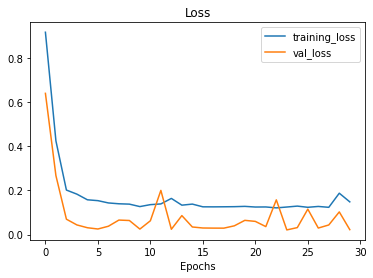

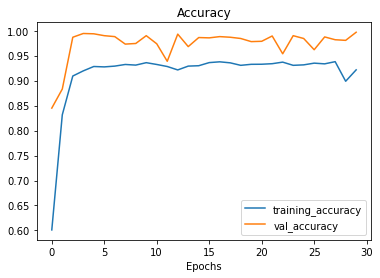

In [9]:
plot_loss_curves(history_1)